# Python and R

In [36]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# show all columns on pandas dataframes
pd.set_option('display.max_columns', None)


The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [38]:
%%R

# My commonly used R imports

require('tidyverse')



# Read the data



The cell below loads the data in python:

In [39]:
df = pd.read_csv('raw-polls.csv')
df.sample(5)

,poll_id,question_id,race_id,year,race,location,type_simple,type_detail,pollster,pollster_rating_id,methodology,partisan,polldate,samplesize,cand1_name,cand1_id,cand1_party,cand1_pct,cand2_name,cand2_id,cand2_party,cand2_pct,cand3_pct,margin_poll,electiondate,cand1_actual,cand2_actual,margin_actual,bias,rightcall,comment
683,6366,27435,1693,2000,2000_Sen-G_MA,MA,Sen-G,Sen-G,RKM Research and Communications Inc.,272,Live Phone,NaN,10/25/00,400.0,Edward M. Kennedy,3693,DEM,60.0,Jack E. Robinson,3694,REP,11.0,9.0,49.0,11/7/00,72.69,12.86,59.83,-10.83,1.0,NaN
798,6294,88020,1423,2000,2000_Gov-G_NC,NC,Gov-G,Gov-G,Mason-Dixon Polling & Strategy,197,Live Phone,NaN,10/29/00,625.0,Mike Easley,12972,DEM,48.0,Richard Vinroot,12973,REP,41.0,NaN,7.0,11/7/00,52.02,46.26,5.76,1.24,1.0,NaN
5511,32748,84180,1300,2010,2010_Gov-G_OR,OR,Gov-G,Gov-G,SurveyUSA,325,IVR/Live Phone,NaN,10/26/10,580.0,John Kitzhaber,11324,DEM,48.0,Chris Dudley,11325,REP,41.0,1.0,7.0,11/2/10,49.29,47.76,1.53,5.47,1.0,NaN
4067,16792,21706,728,2008,2008_Pres-G_MO,MO,Pres-G,Pres-G,Rasmussen Reports/Pulse Opinion Research,277,IVR,NaN,10/19/08,1000.0,Barack Obama,41,DEM,49.0,John McCain,44,REP,44.0,2.0,5.0,11/4/08,49.29,49.43,-0.13,5.13,0.0,NaN
6635,30556,36725,1504,2012,2012_Sen-G_WI,WI,Sen-G,Sen-G,Clout Research/Wenzel Strategies,55,IVR,R,10/31/12,1074.0,Tammy Baldwin,2246,DEM,45.0,Tommy Thompson,2247,REP,47.0,NaN,-2.0,11/6/12,51.41,45.86,5.55,-7.55,0.0,for unspecified Republican sponsor


The cell below loads the same data in R:

In [40]:
%%R

df <- read_csv('raw-polls.csv')

df

Rows: 10776 Columns: 31
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (14): race, location, type_simple, type_detail, pollster, methodology, p...
dbl (17): poll_id, question_id, race_id, year, pollster_rating_id, samplesiz...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 10,776 × 31
   poll_id questio…¹ race_id  year race  locat…² type_…³ type_…⁴ polls…⁵ polls…⁶
     <dbl>     <dbl>   <dbl> <dbl> <chr> <chr>   <chr>   <chr>   <chr>     <dbl>
 1   26013     87909    1455  1998 1998… NY      Gov-G   Gov-G   Blum &…      32
 2   26255     87926    1456  1998 1998… OH      Gov-G   Gov-G   Univer…     346
 3   26026     31266    1736  1998 1998… NV      Sen-G   Sen-G   FM3 Re…      91
 4   26013     31253    1738  1998 1998… NY      Sen-G   Sen-G   Blum &…      32
 5   63632    117103    1738  1998 1998… NY      Sen-G 

# Guided Exploration

In this section you'll make a few charts to explore the data. Here I will raise some questions for you to dig around in the data and answer. You can use summary statistics and/or charts to help answer the questions. You will have to make some methodological choices along the way. Be aware of what choices you're making! I'll ask you about them shortly.


## Question 1: How accurate are polls from the following pollsters?
Characterize the accuracy of each of these pollsters in a sentence or two. Then, write another few sentences justifying your characterization with insights from the data.
- Siena College/The New York Times Upshot
- Jayhawk Consulting
- Fox News/Beacon Research/Shaw & Co. Research
- Brown University
- American Research Group


👉 **Siena College/The New York Times Upshot** 



In [41]:
%%R

siena <- df %>%
    filter(pollster=='Siena College/The New York Times Upshot')

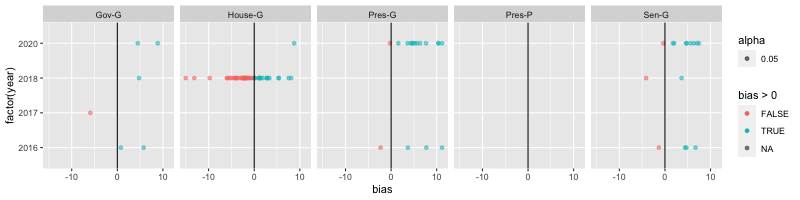

In [74]:
%%R -h 200 -w 800

ggplot(siena, aes(x=bias)) +
    aes(x=bias, y=factor(year), color=bias>0, alpha=.05) + 
    geom_point() +
    geom_vline(aes(xintercept=0)) +
    facet_wrap(~type_simple, ncol=5)

In [43]:
%%R 

siena$bias %>% summary()

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
-15.010  -2.075   1.515   1.423   5.125  11.200       1 


Siena College/The New York Times Upshot seems generally seem be a little skewed towards the democrats (except for the 2018 house race, where they had some off polls on both sides). It also seems liek they mostly poll the presidential and senate races. 

👉 **Jayhawk Consulting**

In [44]:
%%R

jayhawk <- df %>%
    filter(pollster=='Jayhawk Consulting Services')

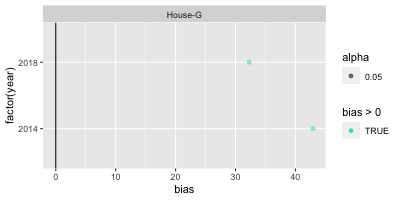

In [81]:
%%R -h 200 -w 400

ggplot(jayhawk, aes(x=bias)) +
    aes(x=bias, y=factor(year), color=bias>0, alpha=.05) + 
    geom_point() +
    geom_vline(aes(xintercept=0)) +
    facet_wrap(~type_simple) +
    scale_color_manual(values=c('turquoise'))

In [46]:
%%R 

jayhawk$bias %>% summary()

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  32.29   34.95   37.62   37.62   40.28   42.94 


This pollster did only conduct two polls (with four years inbetween!), so it is hard to say anything about their accuracy. However the few polls they did conduct seem to be pretty inacurate (between 30 and 40!), with the polls being skewed towards the democrats.

👉 **Fox News/Beacon Research/Shaw & Co. Research**

In [47]:
%%R

fox_beacon <- df %>%
    filter(pollster=='Fox News/Beacon Research/Shaw & Co. Research')

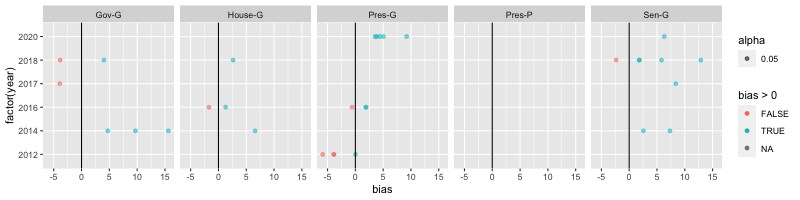

In [82]:
%%R -h 200 -w 800

ggplot(fox_beacon, aes(x=bias)) +
    aes(x=bias, y=factor(year), color=bias>0, alpha=.05) + 
    geom_point() +
    geom_vline(aes(xintercept=0)) +
    facet_wrap(~type_simple, ncol=5)

In [49]:
%%R 

fox_beacon$bias %>% summary()

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 -5.870  -0.290   2.630   3.073   6.060  15.610      15 


The Fox News/Beacon Research/Shaw & Co. Research pollster also seems to be skewed towards the democrats – especially the recent presidential election. However, the did not conduct enough polls each election year in each race to enable a good characterization of their accuracy on that level. Median and mean is more off (further away from 0) than the NYT.  

👉 **Brown University**

In [50]:
%%R

brown <- df %>%
    filter(pollster=='Brown University') 

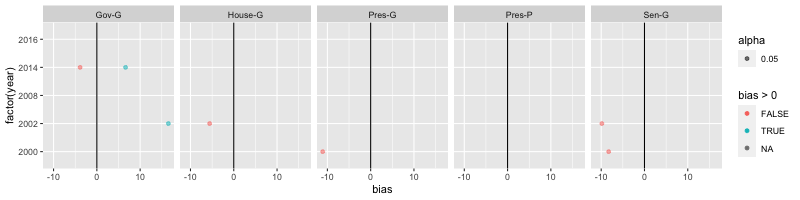

In [73]:
%%R -h 200 -w 800

ggplot(brown, aes(x=bias)) +
    aes(x=bias, y=factor(year), color=bias>0, alpha=.05) + 
    geom_point() +
    geom_vline(aes(xintercept=0)) +
    facet_wrap(~type_simple, ncol=5)

In [52]:
%%R 

brown$bias %>% summary()

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
-11.080  -9.060  -5.570  -2.213   1.380  16.520       5 


Looking alone at the median and mean, this poll is the only one that is skewed towards the republicans. When we look more closely at the data, we also notice that the sample size is pretty small (below 500 in most cases). This further adds to the uncertainty of the polls.

Hmmm it seems like we are missing some polls (several presidential primary polls in 2000). What is happening?

👉 **American Research Group**

In [53]:
%%R

arg <- df %>%
    filter(pollster=='American Research Group')

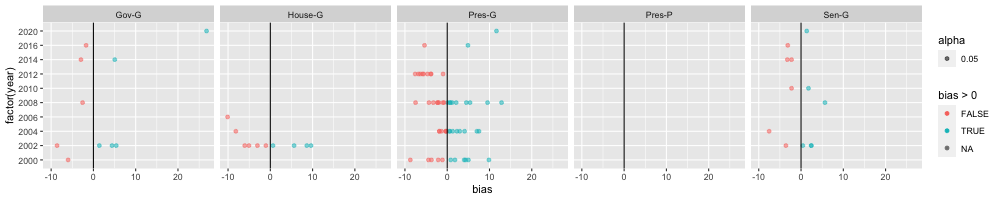

In [54]:
%%R -h 200 -w 1000

ggplot(arg, aes(x=bias)) +
    aes(x=bias, y=factor(year), color=bias>0, alpha=.05) + 
    geom_point() +
    geom_vline(aes(xintercept=0)) +
    facet_wrap(~type_simple, ncol=5)

In [83]:
%%R 

arg$bias %>% summary()

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
-10.100  -3.502  -0.560   0.113   2.825  26.760     191 


Mean and median wise, this poll is the most accurate. All their senate polls are within a 10 point bias margin. We can see a slight shift from democratic biased to republican biased polls from 2002 to 2012. They haven't conducted as many polls in the last couple of years but from the few they did, it might lean towards the democrats again?

### Question 2: Which pollsters are the most accurate? Which are the least accurate?

👉 Which pollsters are the most accurate?

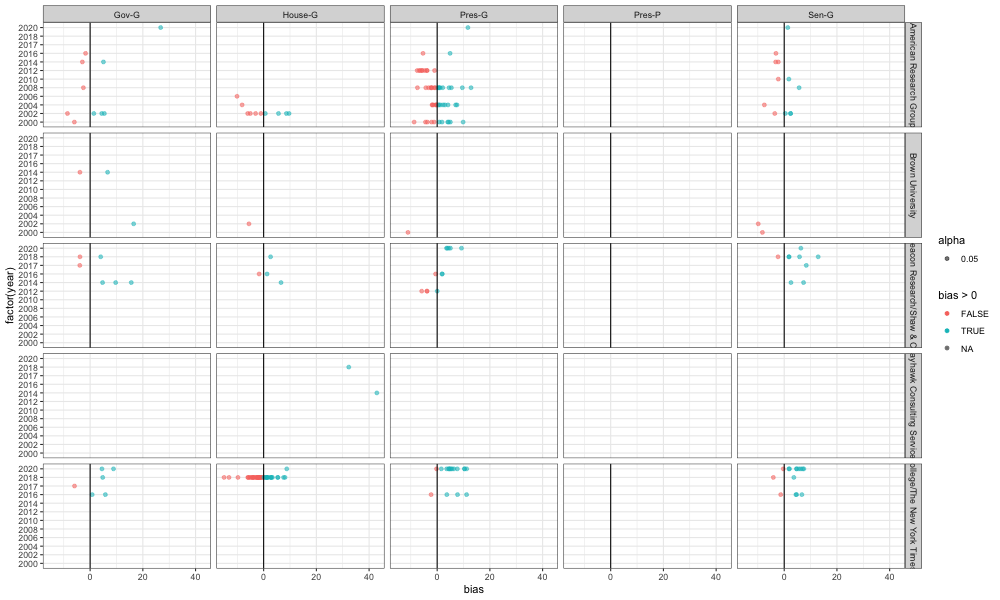

In [85]:
%%R -h 600 -w 1000
pollster <- df %>%
    filter(grepl('Fox News/Beacon Research/Shaw & Co. Research|Siena College/The New York Times Upshot|American Research Group|Brown University|Jayhawk Consulting Services', pollster))

ggplot(pollster, aes(x=bias)) +
    aes(x=bias, y=factor(year), color=bias>0, alpha=.05) + 
    geom_point() +
    geom_vline(aes(xintercept=0)) +
    theme_bw() +
    facet_grid(pollster ~ type_simple)

Cynthia: The reason why I pick ARG as the most accurate pollster is because they did not show a heavy partisan bias in their polls. Though there are a few outliers where the polls are pretty off, most of their polls are within a reasonable margin of biaes.

Laura: I would pick siena college/NYT Upshot. In more recent years they have done several polls on the presidental election and senate races and although they are a bit democratic biased, they are all within a 10-12 point margin.

👉 Which are the least accurate?

Here we agree on Jayhawk Consulting. They only conducted two polls, both of which were both more than 30 points off. Not very impressive.

### Question 2 Reflections

👉 Write a summary paragraph explaining how you decided what constitutes “most accurate” and "least accurate"?


We tried to break the data down to as many levels as possible (election type, year) and compare the polls next to each other to better see the differences between them. 

When we considered the accuracy, we looked at how biased the total pool of polls in each category for each year was – not the total amount of polls conducted by the pollsters. We also looked at the sample size of the polls to get a better sense of a potential margin of error (although we did not calculate it or plot it). 

We also considered the number of polls conducted by each pollster to put the outliers/off polls into perspective: Was it just one poll or did they conduct several polls that were off?

👉 In bullet point form, name **methodological choices** you made in the process of determining which pollsters were the most and least accurate.


- We chose to focus mainly on the years and the election types and comparing the pollsters based on the distributions of the biases/accuracy of their polls while excluding other factors that could be indicators of the accuracy of the polls (like sample size, number of polls conducted, etc.)

👉 In bullet point form, list the **limitations** of your approach 


Our approach is very much just based on eyeballing the data. It might be wise to get some measurements on the accuracy of each pollsters polls for each year and election instead of just the totals.

We could have looked into the margin of errors and the total number of right calls for each pollster too. Or how close to the election date the polls were conducted – something that generally has an impact on the accuracy of the polls. 